In [1]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [2]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

In [3]:
land_df,sea_df = do.separate_by_region(df)

In [5]:
df_avg = do.average(land_df,0.1,1.0)
df_avg

,avgh001h010,precipBelow6
38,1.439807,0.860
135,8.846153,1.737
173,0.457432,0.342
369,5.345251,0.536
376,0.000000,0.000
...,...,...
90434,0.000000,0.000
90863,5.042952,0.792
91018,0.000000,0.000
92156,0.304105,0.002


In [16]:
auxiliary_df = df_avg[df_avg['precipBelow6']>0]
truth_th = auxiliary_df['precipBelow6'].quantile(0.98)
truth = (df_avg['precipBelow6']>truth_th).to_numpy()
probs = (df_avg['avgh001h010']/df_avg['avgh001h010'].max()).to_numpy()

In [146]:
#convert float inputs to string to find labels in dataframe
hi = 0.1
hf = 7.0
percentile = 0.98
df_avg = do.average(df,hi,hf)

str1 = 'h'+str(int(hi*10)).zfill(3)
str2 = 'h'+str(int(hf*10)).zfill(3)

df_avg = df_avg.drop(df_avg[(df_avg['avg'+str1+''+str2] >1.5) & (df_avg['precipBelow6']<0.3)].index)


#build numpy array with normalized averages
probs = (df_avg['avg'+str1+''+str2]/df_avg['avg'+str1+''+str2].max()).to_numpy()

#Build boolean Truth array with True above percentile 
#the percentile ignores 0 values  
auxiliary_df = df_avg[df_avg['precipBelow6']>0]
truth_th = auxiliary_df['precipBelow6'].quantile(percentile)
truth = (df_avg['precipBelow6']>truth_th).to_numpy()

In [125]:
truth

array([False, False,  True, ..., False, False, False])

In [126]:
probs

array([0.00154218, 0.0212529 , 0.26162345, ..., 0.07344851, 0.        ,
       0.        ])

In [127]:
df_avg

,avgh001h070,precipBelow6
0,0.045595,0.000
15,0.628345,0.145
18,7.734930,5.963
20,0.000000,0.000
32,0.084997,0.022
...,...,...
93048,0.049888,0.000
93049,0.288335,0.000
93052,2.171515,0.671
93054,0.000000,0.000


In [128]:
precision, recall, thresholds = precision_recall_curve(truth, probs)

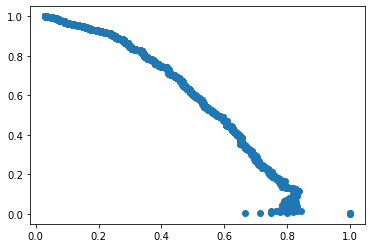

In [129]:
plt.scatter(precision, recall)

In [147]:
truth_th

3.491